In [60]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [73]:
def get_pr_dict(min_pop, max_pop, fidelity):
    temp = []
    for i in range(min_pop*fidelity,max_pop*fidelity):
        c = f_pop(i/fidelity)
        c = 100*c
        c = int(c)
        for j in range(c):
            temp.append(i/fidelity)

    temp_d = {}
    for i in temp:
        temp_d[i] = 1 if i not in temp_d else temp_d[i]+1

    temp_d_sum = sum(temp_d.values())
    temp_d = {k:v/temp_d_sum for k,v in temp_d.items()}
    vals = list(temp_d.values())

    pr_dict = {}
    cum_sum = [sum(vals[:i+1]) for i in range(len(vals)-1)] + [1]
    for k, v in zip(temp_d.keys(), cum_sum):
        pr_dict[k] = v
    return pr_dict


def get_pop_pr(pr_df, pr):
    df = pr_df.copy()
    df = df[df['Probability']>=pr]
    return df['Population'].min()

# Parameterize Population

In [ ]:
min_pop = 5
max_pop = 7
slope = 1/(min_pop-max_pop)
f_pop = lambda x: slope*x + max_pop*slope*-1

# Population Distribution

In [74]:
pr_dict = get_pr_dict(min_pop, max_pop, 1000)
pr_df = pd.DataFrame({'Population':pr_dict.keys(), 'Probability':pr_dict.values()})

# Create MC Population

In [146]:
N = 10000

mc_df = pd.DataFrame({})
mc_df['rand1'] = np.random.random(N)
mc_df['Population'] = mc_df['rand1'].apply(lambda x: get_pop_pr(pr_df, x))
mc_df

rand1  Population
0     0.432418       5.490
1     0.382944       5.426
2     0.042831       5.043
3     0.130186       5.134
4     0.290165       5.313
...        ...         ...
9995  0.053082       5.053
9996  0.681896       5.867
9997  0.775788       6.047
9998  0.726851       5.950
9999  0.983222       6.732

[10000 rows x 2 columns]

<AxesSubplot:>

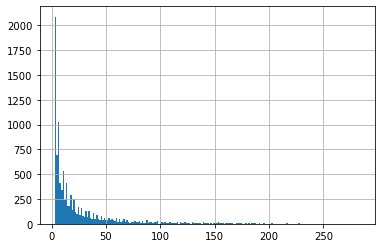

In [147]:
min_samples = 1

samples = lambda x: int(max(0.00003*(10**x), min_samples))
mc_df['Samples'] = mc_df['Population'].apply(samples)
mc_df['Samples'].hist(bins=200)

In [148]:
def calc_city_alpha(s, pr):
    rands = np.random.random(size=s)
    results = [1 if pr>=i else 0 for i in rands]
    alpha = sum(results)/len(results)
    return alpha

calc_city_alpha(10, 0.5)


0.7

In [165]:
pr_alpha = 0.01
alpha_spread = 0.005
mc_df['City_alpha_input'] = np.random.normal(loc=pr_alpha, scale=alpha_spread, size=len(mc_df))

resp_samples = mc_df['Samples'].tolist()
city_alpha_pr = mc_df['City_alpha_input'].tolist()
alphas = [calc_city_alpha(resp_samples[i], city_alpha_pr[i]) for i in range(len(resp_samples))]
mc_df['alpha'] = alphas

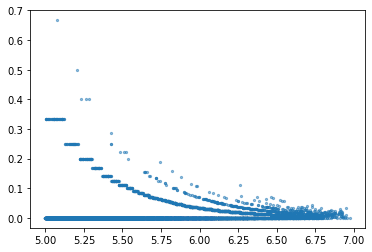

In [166]:
plt.figure(facecolor='white')
plt.scatter(mc_df['Population'], mc_df['alpha'],s=5, alpha=0.5)